<h3>Bibliotecas</h3>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import holidays as hd

<h3>Buscando dados</h3>

In [53]:
#import data from excel economatica.xlsx
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_excel('BBG - ECO DASH.xlsx', sheet_name='BZ RATES', skiprows=1 , thousands='.', decimal=',')
df.head()

#drop column unnamed
df.drop('Unnamed: 1', axis=1, inplace=True)
df.drop('Unnamed: 2', axis=1, inplace=True)
df.drop('Unnamed: 3', axis=1, inplace=True)
df.drop('ODF25 Comdty', axis=1, inplace=True)
df.head()
df.rename(columns={'Unnamed: 4':'Date'}, inplace=True)

#remover primeira linha
df = df.drop([0])
df.head()

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.rename(columns={'ODF25 Comdty.1' : 'ODF25 Comdty'}, inplace=True)

df.head()
df.drop('OI1 Comdty', axis=1, inplace=True)
df.drop('WSP1 Index', axis=1, inplace=True)
df.columns = ['Date','DI_25','DI_26', 'DI_27','DI_28','DI_29', 'DI_30', 'DI_31', 'DI_32','DI_33','DI_35','DAP25','DAP26','DAP27','DAP28','DAP30','DAP32','DAP35','DAP40','WDO1','IBOV','TREASURY','S&P']
df.head()


,Date,DI_25,DI_26,DI_27,DI_28,DI_29,DI_30,DI_31,DI_32,DI_33,...,DAP27,DAP28,DAP30,DAP32,DAP35,DAP40,WDO1,IBOV,TREASURY,S&P
1,2020-01-09,73581.04,68474.64,63599.49,59096.78,54839.65,50909.64,46957.02,NaN,NaN,...,NaN,101682.24,93324.06,NaN,77072.25,NaN,40906.60,116359,527247.62,33502.51
2,2020-01-10,73599.10,68415.38,63574.56,59046.46,54762.84,50829.18,46874.38,NaN,NaN,...,NaN,102002.47,93558.90,NaN,77301.93,NaN,40848.27,115726,527261.71,33339.85
3,2020-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-13,73411.89,68184.79,63302.33,58712.25,54368.13,50421.39,46459.98,NaN,NaN,...,NaN,101566.90,93244.27,NaN,76789.99,NaN,41448.52,117775,534361.78,34088.82


<h3>Tratando</h3>

In [54]:
#drop nan values and the values with '-' in the dataframe
df = df.replace('-', np.nan)
df = df.replace(' ', np.nan)
df = df.replace('', np.nan)
#df.dropna(inplace=True)
df.head(10)

,Date,DI_25,DI_26,DI_27,DI_28,DI_29,DI_30,DI_31,DI_32,DI_33,...,DAP27,DAP28,DAP30,DAP32,DAP35,DAP40,WDO1,IBOV,TREASURY,S&P
1,2020-01-09,73581.04,68474.64,63599.49,59096.78,54839.65,50909.64,46957.02,NaN,NaN,...,NaN,101682.24,93324.06,NaN,77072.25,NaN,40906.60,116359,527247.62,33502.51
2,2020-01-10,73599.10,68415.38,63574.56,59046.46,54762.84,50829.18,46874.38,NaN,NaN,...,NaN,102002.47,93558.90,NaN,77301.93,NaN,40848.27,115726,527261.71,33339.85
3,2020-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-13,73411.89,68184.79,63302.33,58712.25,54368.13,50421.39,46459.98,NaN,NaN,...,NaN,101566.90,93244.27,NaN,76789.99,NaN,41448.52,117775,534361.78,34088.82
6,2020-01-14,73635.24,68430.90,63566.16,58968.03,54609.84,50645.49,46662.31,NaN,NaN,...,NaN,102059.60,93595.39,NaN,77298.38,NaN,41376.98,117879,534344.80,33980.84
7,2020-01-15,73859.06,68658.55,63748.05,59136.98,54761.21,50799.99,46817.83,NaN,NaN,...,NaN,102130.48,93661.29,NaN,77239.79,NaN,41794.37,116757,540583.85,34331.46
8,2020-01-16,73500.56,68256.04,63310.92,58672.16,54276.73,50323.28,46357.41,NaN,NaN,...,NaN,101820.47,93117.76,NaN,76809.18,NaN,41995.37,116978,542396.24,34824.66
9,2020-01-17,73689.48,68463.80,63615.61,59014.79,54653.96,50710.33,46748.62,NaN,NaN,...,NaN,102016.71,93143.95,NaN,77057.59,NaN,41703.24,118728,538166.97,34697.10
10,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 1 to 1801
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1801 non-null   datetime64[ns]
 1   DI_25     1231 non-null   object        
 2   DI_26     1231 non-null   object        
 3   DI_27     1231 non-null   object        
 4   DI_28     1231 non-null   object        
 5   DI_29     1231 non-null   object        
 6   DI_30     1231 non-null   object        
 7   DI_31     1231 non-null   object        
 8   DI_32     719 non-null    object        
 9   DI_33     1221 non-null   object        
 10  DI_35     1222 non-null   object        
 11  DAP25     1231 non-null   object        
 12  DAP26     1231 non-null   object        
 13  DAP27     734 non-null    object        
 14  DAP28     1231 non-null   object        
 15  DAP30     1231 non-null   object        
 16  DAP32     738 non-null    object        
 17  DAP35     1231

In [56]:
# Transform the columns DI and DAP in float 
df['DI_25'] = df['DI_25'].astype(float)
df['DI_26'] = df['DI_26'].astype(float)
df['DI_27'] = df['DI_27'].astype(float)
df['DI_28'] = df['DI_28'].astype(float)
df['DI_29'] = df['DI_29'].astype(float)
df['DI_30'] = df['DI_30'].astype(float)
df['DI_31'] = df['DI_31'].astype(float)
df['DI_32'] = df['DI_32'].astype(float)
df['DI_33'] = df['DI_33'].astype(float)
df['DI_35'] = df['DI_35'].astype(float)

df['DAP25'] = df['DAP25'].astype(float)
df['DAP26'] = df['DAP26'].astype(float)
df['DAP27'] = df['DAP27'].astype(float)
df['DAP28'] = df['DAP28'].astype(float)
df['DAP30'] = df['DAP30'].astype(float)
df['DAP32'] = df['DAP32'].astype(float)
df['DAP35'] = df['DAP35'].astype(float)
df['DAP40'] = df['DAP40'].astype(float)
df['WDO1'] = df['WDO1'].astype(float)
df['IBOV'] = df['IBOV'].astype(float)
df['TREASURY'] = df['TREASURY'].astype(float)
df['S&P'] = df['S&P'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 1 to 1801
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1801 non-null   datetime64[ns]
 1   DI_25     1231 non-null   float64       
 2   DI_26     1231 non-null   float64       
 3   DI_27     1231 non-null   float64       
 4   DI_28     1231 non-null   float64       
 5   DI_29     1231 non-null   float64       
 6   DI_30     1231 non-null   float64       
 7   DI_31     1231 non-null   float64       
 8   DI_32     719 non-null    float64       
 9   DI_33     1221 non-null   float64       
 10  DI_35     1222 non-null   float64       
 11  DAP25     1231 non-null   float64       
 12  DAP26     1231 non-null   float64       
 13  DAP27     734 non-null    float64       
 14  DAP28     1231 non-null   float64       
 15  DAP30     1231 non-null   float64       
 16  DAP32     738 non-null    float64       
 17  DAP35     1231

In [57]:
df_export = df.dropna().tail(252).to_excel('df_export.xlsx', index=False)

In [58]:
from datetime import datetime, timedelta

def dias_uteis_ate_ano_referencia(ano_referencia):
    # Obter a data atual
    data_atual = datetime.now()
    
    # Data alvo: Primeiro dia do ano de referência
    primeiro_dia = datetime(ano_referencia, 1, 1)
    
    # Obter feriados do Brasil para o intervalo de datas
    feriados = hd.Brazil(years=range(data_atual.year, ano_referencia + 1))

    #Adicionar feriado do Carnaval e Consciencia Negra
    feriados.append(datetime(data_atual.year, 2, 15))
    feriados.append(datetime(data_atual.year, 11, 20))
    
    # Encontrar o primeiro dia útil no ano de referência
    while primeiro_dia.weekday() >= 5 or primeiro_dia in feriados:  # Fim de semana ou feriado
        primeiro_dia += timedelta(days=1)
    
    # Contar os dias úteis entre a data atual e o primeiro dia útil do ano de referência
    dias_uteis = 0
    while data_atual < primeiro_dia:
        if data_atual.weekday() < 5 and data_atual not in feriados:  # Segunda a sexta e não feriado
            dias_uteis += 1
        data_atual += timedelta(days=1)
    
    return dias_uteis

# Exemplo de uso
print(dias_uteis_ate_ano_referencia(2026))
data_atual = datetime.now()
print(data_atual)
feriados = hd.Brazil(years=range(data_atual.year, 2027))
print(feriados)



262
2024-12-23 15:45:46.604911
{datetime.date(2024, 1, 1): 'Confraternização Universal', datetime.date(2024, 3, 29): 'Sexta-feira Santa', datetime.date(2024, 4, 21): 'Tiradentes', datetime.date(2024, 5, 1): 'Dia do Trabalhador', datetime.date(2024, 9, 7): 'Independência do Brasil', datetime.date(2024, 10, 12): 'Nossa Senhora Aparecida', datetime.date(2024, 11, 2): 'Finados', datetime.date(2024, 11, 15): 'Proclamação da República', datetime.date(2024, 12, 25): 'Natal', datetime.date(2025, 1, 1): 'Confraternização Universal', datetime.date(2025, 4, 18): 'Sexta-feira Santa', datetime.date(2025, 4, 21): 'Tiradentes', datetime.date(2025, 5, 1): 'Dia do Trabalhador', datetime.date(2025, 9, 7): 'Independência do Brasil', datetime.date(2025, 10, 12): 'Nossa Senhora Aparecida', datetime.date(2025, 11, 2): 'Finados', datetime.date(2025, 11, 15): 'Proclamação da República', datetime.date(2025, 12, 25): 'Natal', datetime.date(2026, 1, 1): 'Confraternização Universal', datetime.date(2026, 4, 3): 'S

In [59]:
#Calculate the return of the DI_25
df['DI_25_Return'] = df['DI_25'].pct_change()
#Pegar os zeros e adicionar Nan
df['DI_25_Return'] = df['DI_25_Return'].replace(0, np.nan)
df['DI_25_Return']

#Calculate the return of the DI_26
df['DI_26_Return'] = df['DI_26'].pct_change()
#Pegar os zeros e adicionar Nan
df['DI_26_Return'] = df['DI_26_Return'].replace(0, np.nan)
df['DI_26_Return']

#Calculate the return of the DI_27
df['DI_27_Return'] = df['DI_27'].pct_change()
#Pegar os zeros e adicionar Nan
df['DI_27_Return'] = df['DI_27_Return'].replace(0, np.nan)

#Calculate the return of the DI_28
df['DI_28_Return'] = df['DI_28'].pct_change()
#Pegar os zeros e adicionar Nan
df['DI_28_Return'] = df['DI_28_Return'].replace(0, np.nan)

#Calculate the return of the DI_29
df['DI_29_Return'] = df['DI_29'].pct_change()
#Pegar os zeros e adicionar Nan
df['DI_29_Return'] = df['DI_29_Return'].replace(0, np.nan)

#Calculate the return of the DI_30
df['DI_30_Return'] = df['DI_30'].pct_change()
#Pegar os zeros e adicionar Nan
df['DI_30_Return'] = df['DI_30_Return'].replace(0, np.nan)

#Calculate the return of the DI_31
df['DI_31_Return'] = df['DI_31'].pct_change()
#Pegar os zeros e adicionar Nan
df['DI_31_Return'] = df['DI_31_Return'].replace(0, np.nan)

#Calculate the return of the DI_32
df['DI_32_Return'] = df['DI_32'].pct_change()
#Pegar os zeros e adicionar Nan
df['DI_32_Return'] = df['DI_32_Return'].replace(0, np.nan)

#Calculate the return of the DI_33
df['DI_33_Return'] = df['DI_33'].pct_change()
#Pegar os zeros e adicionar Nan
df['DI_33_Return'] = df['DI_33_Return'].replace(0, np.nan)

#Calculate the return of the DI_35
df['DI_35_Return'] = df['DI_35'].pct_change()
#Pegar os zeros e adicionar Nan
df['DI_35_Return'] = df['DI_35_Return'].replace(0, np.nan)

#Calculate the return of the DAP25
df['DAP25_Return'] = df['DAP25'].pct_change()
#Pegar os zeros e adicionar Nan
df['DAP25_Return'] = df['DAP25_Return'].replace(0, np.nan)

#Calculate the return of the DAP26
df['DAP26_Return'] = df['DAP26'].pct_change()
#Pegar os zeros e adicionar Nan
df['DAP26_Return'] = df['DAP26_Return'].replace(0, np.nan)


C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_27556\3178346316.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['DI_25_Return'] = df['DI_25'].pct_change()
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_27556\3178346316.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['DI_26_Return'] = df['DI_26'].pct_change()
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_27556\3178346316.py:14: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change

In [60]:
#Calculate the return of each column in a new column

df['DAP27_Return'] = df['DAP27'].pct_change()
df['DAP27_Return'] = df['DAP27_Return'].replace(0, np.nan)

df['DAP28_Return'] = df['DAP28'].pct_change()
df['DAP28_Return'] = df['DAP28_Return'].replace(0, np.nan)

df['DAP30_Return'] = df['DAP30'].pct_change()
df['DAP30_Return'] = df['DAP30_Return'].replace(0, np.nan)

df['DAP32_Return'] = df['DAP32'].pct_change()
df['DAP32_Return'] = df['DAP32_Return'].replace(0, np.nan)

df['DAP35_Return'] = df['DAP35'].pct_change()
df['DAP35_Return'] = df['DAP35_Return'].replace(0, np.nan)

df['DAP40_Return'] = df['DAP40'].pct_change()
df['DAP40_Return'] = df['DAP40_Return'].replace(0, np.nan)

df['WDO1_Return'] = df['WDO1'].pct_change()
df['WDO1_Return'] = df['WDO1_Return'].replace(0, np.nan)

df['IBOV_Return'] = df['IBOV'].pct_change()
df['IBOV_Return'] = df['IBOV_Return'].replace(0, np.nan)

df['TREASURY_Return'] = df['TREASURY'].pct_change()
df['TREASURY_Return'] = df['TREASURY_Return'].replace(0, np.nan)

df['S&P_Return'] = df['S&P'].pct_change()
df['S&P_Return'] = df['S&P_Return'].replace(0, np.nan)

df.head()


C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_27556\3905476256.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['DAP27_Return'] = df['DAP27'].pct_change()
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_27556\3905476256.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['DAP28_Return'] = df['DAP28'].pct_change()
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_27556\3905476256.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change 

,Date,DI_25,DI_26,DI_27,DI_28,DI_29,DI_30,DI_31,DI_32,DI_33,...,DAP27_Return,DAP28_Return,DAP30_Return,DAP32_Return,DAP35_Return,DAP40_Return,WDO1_Return,IBOV_Return,TREASURY_Return,S&P_Return
1,2020-01-09,73581.04,68474.64,63599.49,59096.78,54839.65,50909.64,46957.02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-10,73599.10,68415.38,63574.56,59046.46,54762.84,50829.18,46874.38,NaN,NaN,...,NaN,0.00,0.00,NaN,0.00,NaN,-0.00,-0.01,0.00,-0.00
3,2020-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-13,73411.89,68184.79,63302.33,58712.25,54368.13,50421.39,46459.98,NaN,NaN,...,NaN,-0.00,-0.00,NaN,-0.01,NaN,0.01,0.02,0.01,0.02


In [61]:
#Create a new dataframe with the returns
df_returns = df[['Date','DI_25_Return','DI_26_Return','DI_27_Return','DI_28_Return','DI_29_Return','DI_30_Return','DI_31_Return','DI_32_Return','DI_33_Return','DI_35_Return','DAP25_Return','DAP26_Return','DAP27_Return','DAP28_Return','DAP30_Return','DAP32_Return','DAP35_Return','DAP40_Return','WDO1_Return','IBOV_Return','TREASURY_Return','S&P_Return']]
df_returns.head(10)


,Date,DI_25_Return,DI_26_Return,DI_27_Return,DI_28_Return,DI_29_Return,DI_30_Return,DI_31_Return,DI_32_Return,DI_33_Return,...,DAP27_Return,DAP28_Return,DAP30_Return,DAP32_Return,DAP35_Return,DAP40_Return,WDO1_Return,IBOV_Return,TREASURY_Return,S&P_Return
1,2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-10,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,NaN,NaN,...,NaN,0.00,0.00,NaN,0.00,NaN,-0.00,-0.01,0.00,-0.00
3,2020-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-13,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,NaN,NaN,...,NaN,-0.00,-0.00,NaN,-0.01,NaN,0.01,0.02,0.01,0.02
6,2020-01-14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,...,NaN,0.00,0.00,NaN,0.01,NaN,-0.00,0.00,-0.00,-0.00
7,2020-01-15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,...,NaN,0.00,0.00,NaN,-0.00,NaN,0.01,-0.01,0.01,0.01
8,2020-01-16,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,NaN,NaN,...,NaN,-0.00,-0.01,NaN,-0.01,NaN,0.00,0.00,0.00,0.01
9,2020-01-17,0.00,0.00,0.00,0.01,0.01,0.01,0.01,NaN,NaN,...,NaN,0.00,0.00,NaN,0.00,NaN,-0.01,0.01,-0.01,-0.00
10,2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


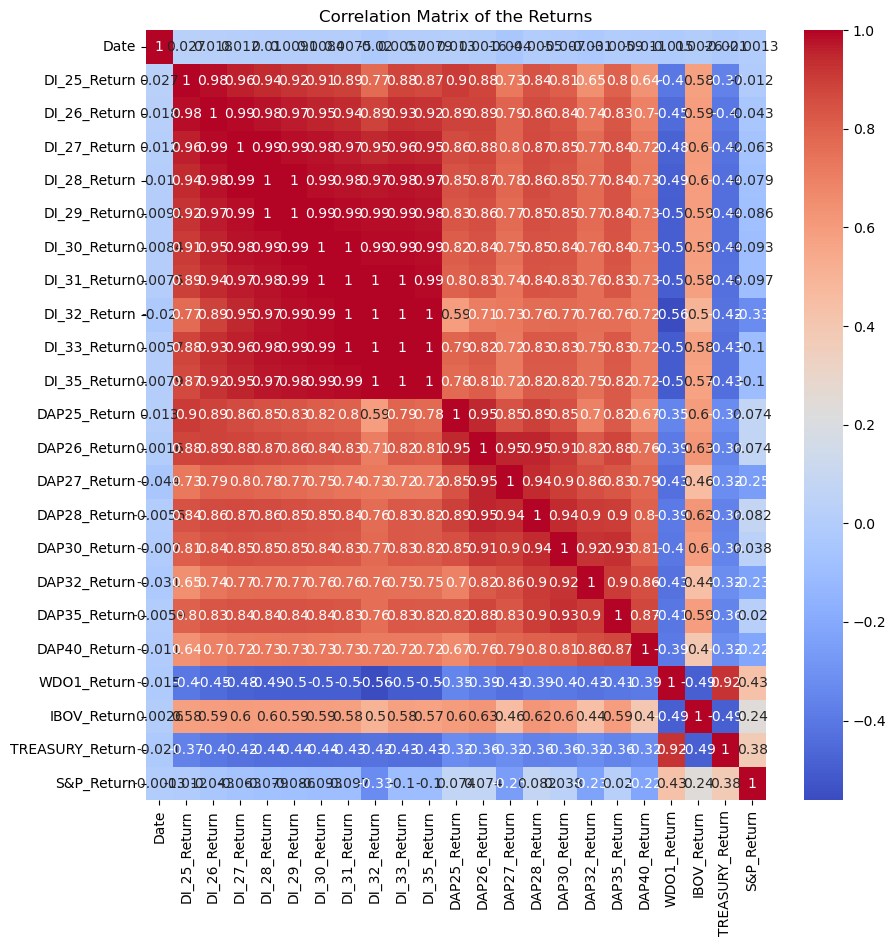

In [62]:
#Calulate the matrix of correlation
correlation_matrix = df_returns.corr()

#plot the heatmap of the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of the Returns')
plt.show()


In [63]:
def calcular_retornos_log(df):
    # Cria um novo DataFrame para armazenar os retornos logarítmicos
    df_returns = pd.DataFrame()

    # Itera sobre as colunas do DataFrame
    for col in df.columns:
        # Verifica se a coluna é do tipo float
        if pd.api.types.is_float_dtype(df[col]):
            # Calcula o retorno logarítmico e adiciona no DataFrame de retornos
            df_returns[f'{col}_Return_Log'] = np.log(df[col] / df[col].shift(1))

    return df_returns

In [64]:
df_retorno = calcular_retornos_log(df)
df_retorno.tail()

c:\Users\emanuel.cabral\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\emanuel.cabral\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\emanuel.cabral\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\emanuel.cabral\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\emanuel.cabral\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\e

,DI_25_Return_Log,DI_26_Return_Log,DI_27_Return_Log,DI_28_Return_Log,DI_29_Return_Log,DI_30_Return_Log,DI_31_Return_Log,DI_32_Return_Log,DI_33_Return_Log,DI_35_Return_Log,...,DAP27_Return_Return_Log,DAP28_Return_Return_Log,DAP30_Return_Return_Log,DAP32_Return_Return_Log,DAP35_Return_Return_Log,DAP40_Return_Return_Log,WDO1_Return_Return_Log,IBOV_Return_Return_Log,TREASURY_Return_Return_Log,S&P_Return_Return_Log
1797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,0.00,0.00,0.01,0.01,0.01,0.02,0.02,0.03,0.03,0.04,...,NaN,NaN,NaN,NaN,NaN,3.77,0.74,-0.35,0.19,-0.12
1799,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.34,0.37,0.80,0.55,0.40,0.17,0.74,0.30,0.70,NaN
1800,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.77,NaN
1801,0.00,-0.00,-0.01,-0.01,-0.02,-0.02,-0.02,-0.02,-0.03,-0.03,...,-1.33,-0.68,-0.07,-0.24,-0.38,NaN,0.26,-0.88,1.04,NaN


In [65]:
#Calculate the return log of all the columns in the dataframe
df_returns['DI_25_Return_Log'] = np.log(df['DI_25']/df['DI_25'].shift(1))
df_returns['DI_26_Return_Log'] = np.log(df['DI_26']/df['DI_26'].shift(1))
df_returns['DI_27_Return_Log'] = np.log(df['DI_27']/df['DI_27'].shift(1))
df_returns['DI_28_Return_Log'] = np.log(df['DI_28']/df['DI_28'].shift(1))
df_returns['DI_29_Return_Log'] = np.log(df['DI_29']/df['DI_29'].shift(1))
df_returns['DI_30_Return_Log'] = np.log(df['DI_30']/df['DI_30'].shift(1))
df_returns['DI_31_Return_Log'] = np.log(df['DI_31']/df['DI_31'].shift(1))
df_returns['DI_32_Return_Log'] = np.log(df['DI_32']/df['DI_32'].shift(1))
df_returns['DI_33_Return_Log'] = np.log(df['DI_33']/df['DI_33'].shift(1))
df_returns['DI_35_Return_Log'] = np.log(df['DI_35']/df['DI_35'].shift(1))

df_returns['DAP25_Return_Log'] = np.log(df['DAP25']/df['DAP25'].shift(1))
df_returns['DAP26_Return_Log'] = np.log(df['DAP26']/df['DAP26'].shift(1))
df_returns['DAP27_Return_Log'] = np.log(df['DAP27']/df['DAP27'].shift(1))
df_returns['DAP28_Return_Log'] = np.log(df['DAP28']/df['DAP28'].shift(1))
df_returns['DAP30_Return_Log'] = np.log(df['DAP30']/df['DAP30'].shift(1))
df_returns['DAP32_Return_Log'] = np.log(df['DAP32']/df['DAP32'].shift(1))
df_returns['DAP35_Return_Log'] = np.log(df['DAP35']/df['DAP35'].shift(1))
df_returns['DAP40_Return_Log'] = np.log(df['DAP40']/df['DAP40'].shift(1))

df_returns['WDO1_Return_Log'] = np.log(df['WDO1']/df['WDO1'].shift(1))
df_returns['IBOV_Return_Log'] = np.log(df['IBOV']/df['IBOV'].shift(1))
df_returns['TREASURY_Return_Log'] = np.log(df['TREASURY']/df['TREASURY'].shift(1))
df_returns['S&P_Return_Log'] = np.log(df['S&P']/df['S&P'].shift(1))


df_returns['DI_25_Return_Log'] = np.log(df['DI_25']/df['DI_25'].shift(1))
df_returns['DI_26_Return_Log'] = np.log(df['DI_26']/df['DI_26'].shift(1))
df_returns['DI_27_Return_Log'] = np.log(df['DI_27']/df['DI_27'].shift(1))
df_returns['DI_28_Return_Log'] = np.log(df['DI_28']/df['DI_28'].shift(1))
df_returns['DI_29_Return_Log'] = np.log(df['DI_29']/df['DI_29'].shift(1))
df_returns['DI_30_Return_Log'] = np.log(df['DI_30']/df['DI_30'].shift(1))
df_returns['DI_31_Return_Log'] = np.log(df['DI_31']/df['DI_31'].shift(1))
df_returns['DI_32_Return_Log'] = np.log(df['DI_32']/df['DI_32'].shift(1))
df_returns['DI_33_Return_Log'] = np.log(df['DI_33']/df['DI_33'].shift(1))
df_returns['DI_35_Return_Log'] = np.log(df['DI_35']/df['DI_35'].shift(1))

df_returns['DAP25_Return_Log'] = np.log(df['DAP25']/df['DAP25'].shift(1))
df_returns['DAP26_Return_Log'] = np.log(df['DAP26']/df['DAP26'].shift(1))
df_returns['DAP27_Return_Log'] = np.log(df['DAP27']/df['DAP27'].shift(1))
df_returns['DAP28_Return_Log'] = np.log(df['DAP28']/df['DAP28'].shift(1))
df_returns['DAP30_Return_Log'] = np.log(df['DAP30']/df['DAP30'].shift(1))
df_returns['DAP32_Return_Log'] = np.log(df['DAP32']/df['DAP32'].shift(1))
df_returns['DAP35_Return_Log'] = np.log(df['DAP35']/df['DAP35'].shift(1))
df_returns['DAP40_Return_Log'] = np.log(df['DAP40']/df['DAP40'].shift(1))

df_returns['WDO1_Return_Log'] = np.log(df['WDO1']/df['WDO1'].shift(1))
df_returns['IBOV_Return_Log'] = np.log(df['IBOV']/df['IBOV'].shift(1))
df_returns['TREASURY_Return_Log'] = np.log(df['TREASURY']/df['TREASURY'].shift(1))
df_returns['S&P_Return_Log'] = np.log(df['S&P']/df['S&P'].shift(1))
# Remover as colunas especificadas do DataFrame
df_returns = df_returns.drop(
    ['DI_25_Return', 'DI_26_Return', 'DI_27_Return', 'DI_28_Return', 'DI_29_Return',
     'DI_30_Return', 'DI_31_Return', 'DI_32_Return', 'DI_33_Return', 'DI_35_Return',
     'DAP25_Return', 'DAP26_Return', 'DAP27_Return', 'DAP28_Return', 'DAP30_Return',
     'DAP32_Return', 'DAP35_Return', 'DAP40_Return', 'WDO1_Return', 'IBOV_Return',
     'TREASURY_Return', 'S&P_Return'],
    axis=1,   # Remove colunas (axis=1)
    errors='ignore'  # Evita erro se alguma coluna não existir no DataFrame
)
df_returns.tail(10)

C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_27556\3019456502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_returns['DI_25_Return_Log'] = np.log(df['DI_25']/df['DI_25'].shift(1))
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_27556\3019456502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_returns['DI_26_Return_Log'] = np.log(df['DI_26']/df['DI_26'].shift(1))
C:\Users\emanuel.cabral\AppData\Local\Temp\ipykernel_27556\3019456502.py:4: SettingWithCopyWarning: 
A value is trying t

,Date,DI_25_Return_Log,DI_26_Return_Log,DI_27_Return_Log,DI_28_Return_Log,DI_29_Return_Log,DI_30_Return_Log,DI_31_Return_Log,DI_32_Return_Log,DI_33_Return_Log,...,DAP27_Return_Log,DAP28_Return_Log,DAP30_Return_Log,DAP32_Return_Log,DAP35_Return_Log,DAP40_Return_Log,WDO1_Return_Log,IBOV_Return_Log,TREASURY_Return_Log,S&P_Return_Log
1792,2024-12-04,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.00,0.00,-0.00,0.00,0.00,0.00
1793,2024-12-05,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,0.01,-0.01,-0.01
1794,2024-12-06,0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.02,...,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,0.02,-0.02,0.02,0.02
1795,2024-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1796,2024-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1797,2024-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,2024-12-10,0.00,0.00,0.01,0.01,0.01,0.02,0.02,0.03,0.03,...,0.00,0.00,0.01,0.01,0.01,0.02,-0.00,0.01,-0.01,-0.01
1799,2024-12-11,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,...,0.00,0.01,0.01,0.01,0.02,0.02,-0.01,0.01,-0.01,0.00
1800,2024-12-12,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.03,-0.00,-0.00
1801,2024-12-13,0.00,-0.00,-0.01,-0.01,-0.02,-0.02,-0.02,-0.02,-0.03,...,-0.00,-0.00,-0.01,-0.01,-0.01,0.00,0.00,-0.01,-0.00,0.00


<H1>Calculo da Matrix de Cor</H1>

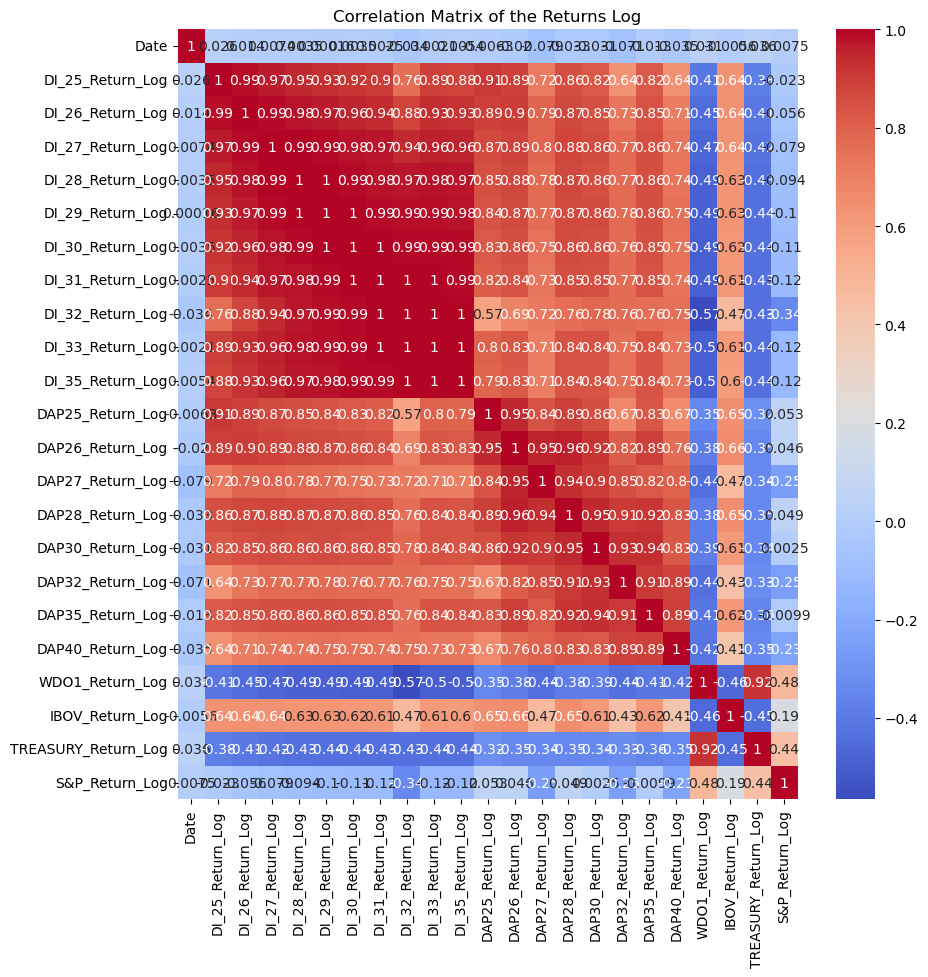

In [66]:
#PLOT THE MATRIX OF CORRELATION OF THE RETURNS LOG WITHOUT DATE

plt.figure(figsize=(10,10))
sns.heatmap(df_returns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of the Returns Log')
plt.show()

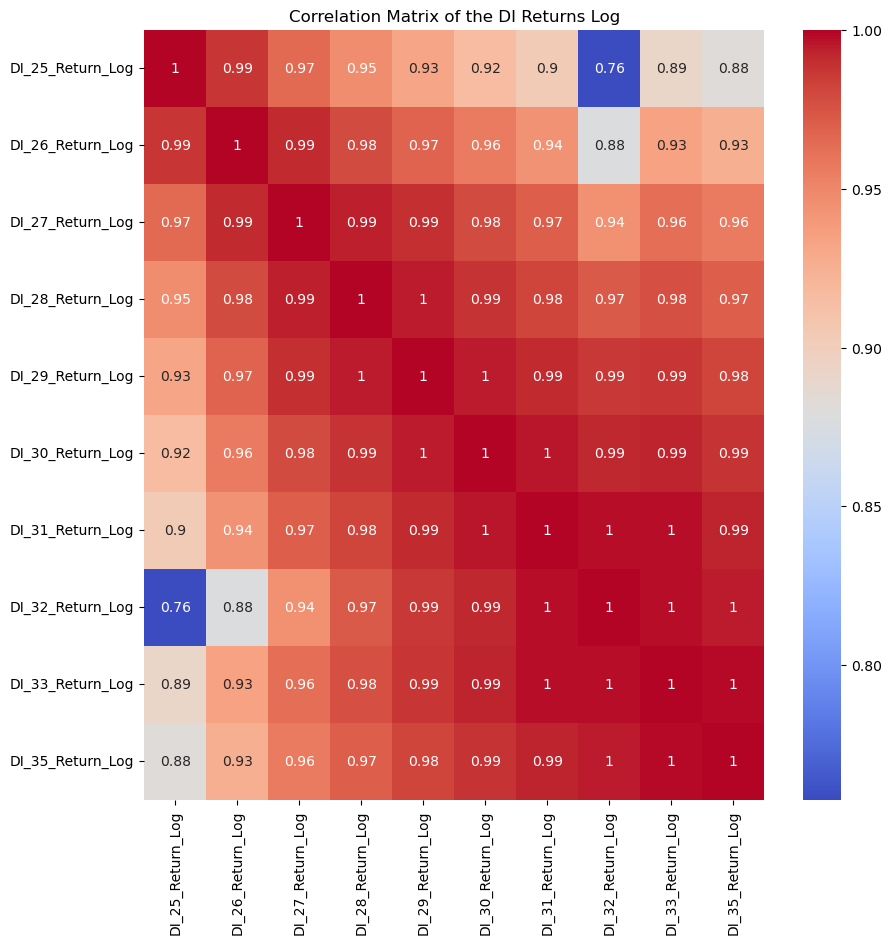

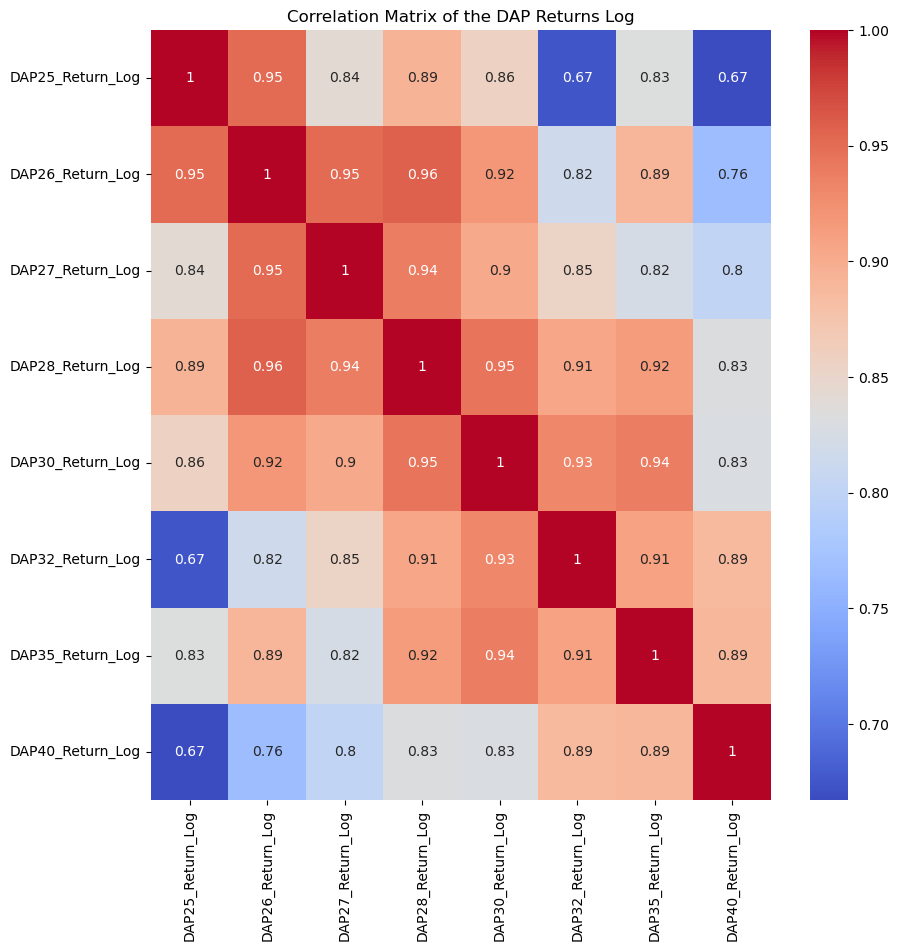

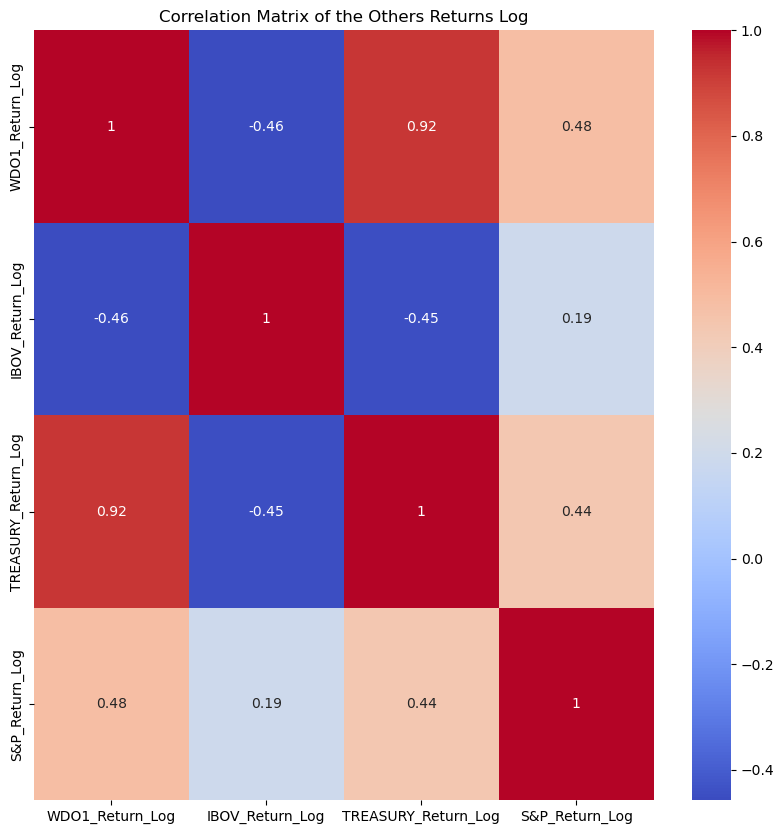

In [67]:
#PLOT THE MATRIX OF THE DI
df_DI = df_returns[['DI_25_Return_Log','DI_26_Return_Log','DI_27_Return_Log','DI_28_Return_Log','DI_29_Return_Log','DI_30_Return_Log','DI_31_Return_Log','DI_32_Return_Log','DI_33_Return_Log','DI_35_Return_Log']]
plt.figure(figsize=(10,10))
sns.heatmap(df_DI.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of the DI Returns Log')
plt.show()

#PLOT THE MATRIX OF THE DAP
df_DAP = df_returns[['DAP25_Return_Log','DAP26_Return_Log','DAP27_Return_Log','DAP28_Return_Log','DAP30_Return_Log','DAP32_Return_Log','DAP35_Return_Log','DAP40_Return_Log']]
plt.figure(figsize=(10,10))
sns.heatmap(df_DAP.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of the DAP Returns Log')
plt.show()

#PLOT THE MATRIX OF THE OTHERS
df_OTHERS = df_returns[['WDO1_Return_Log','IBOV_Return_Log','TREASURY_Return_Log','S&P_Return_Log']]
plt.figure(figsize=(10,10))
sns.heatmap(df_OTHERS.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of the Others Returns Log')
plt.show()

<Figure size 1000x1000 with 0 Axes>

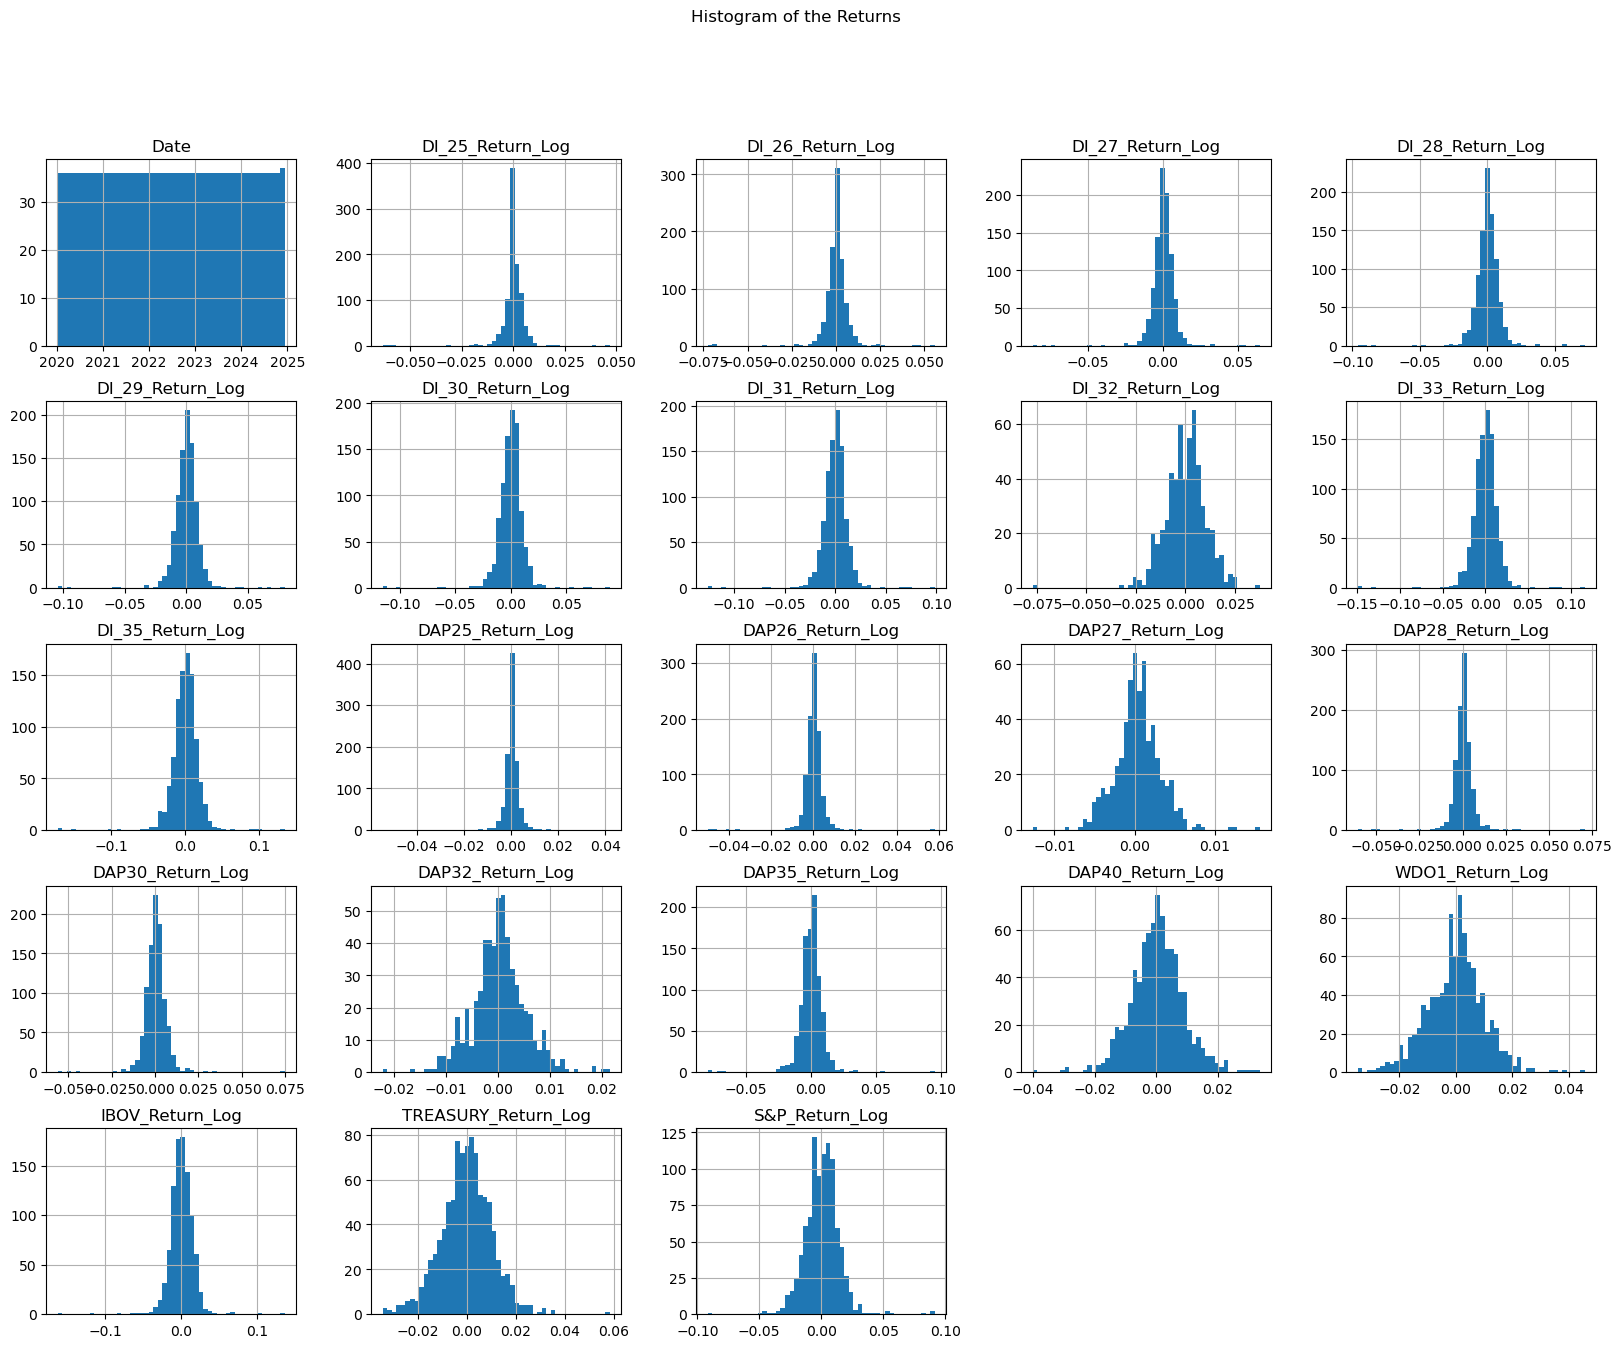

In [68]:
#PLOT THE HISTOGRAM OF THE RETURNS
plt.figure(figsize=(10,10))
df_returns.hist(bins=50, figsize=(20,15))
plt.suptitle('Histogram of the Returns')
plt.show()



In [69]:
df_volatilidade_DI25 = df_returns['DI_25_Return_Log'].std()

# Calcular a volatilidade anualizada (volatilidade * sqrt(252))
volatilidade_anualizada = df_volatilidade_DI25 * np.sqrt(252)
print(f'Volatilidade Anualizada: {volatilidade_anualizada:.2%}')

#Fazer o mesmo para os outros ativos
df_volatilidade_DI25 = df_returns['DI_25_Return_Log'].std()
df_volatilidade_DI26 = df_returns['DI_26_Return_Log'].std()
df_volatilidade_DI27 = df_returns['DI_27_Return_Log'].std()
df_volatilidade_DI28 = df_returns['DI_28_Return_Log'].std()
df_volatilidade_DI29 = df_returns['DI_29_Return_Log'].std()
df_volatilidade_DI30 = df_returns['DI_30_Return_Log'].std()
df_volatilidade_DI31 = df_returns['DI_31_Return_Log'].std()
df_volatilidade_DI32 = df_returns['DI_32_Return_Log'].std()
df_volatilidade_DI33 = df_returns['DI_33_Return_Log'].std()
df_volatilidade_DI35 = df_returns['DI_35_Return_Log'].std()
df_volatilidade_DAP25 = df_returns['DAP25_Return_Log'].std()
df_volatilidade_DAP26 = df_returns['DAP26_Return_Log'].std()
df_volatilidade_DAP27 = df_returns['DAP27_Return_Log'].std()
df_volatilidade_DAP28 = df_returns['DAP28_Return_Log'].std()
df_volatilidade_DAP30 = df_returns['DAP30_Return_Log'].std()
df_volatilidade_DAP32 = df_returns['DAP32_Return_Log'].std()
df_volatilidade_DAP35 = df_returns['DAP35_Return_Log'].std()
df_volatilidade_DAP40 = df_returns['DAP40_Return_Log'].std()
df_volatilidade_WDO1 = df_returns['WDO1_Return_Log'].std()
df_volatilidade_IBOV = df_returns['IBOV_Return_Log'].std()
df_volatilidade_TREASURY = df_returns['TREASURY_Return_Log'].std()
df_volatilidade_SP = df_returns['S&P_Return_Log'].std()

volatilidade_anualizada_DI25 = df_volatilidade_DI25 * np.sqrt(252)
volatilidade_anualizada_DI26 = df_volatilidade_DI26 * np.sqrt(252)
volatilidade_anualizada_DI27 = df_volatilidade_DI27 * np.sqrt(252)
volatilidade_anualizada_DI28 = df_volatilidade_DI28 * np.sqrt(252)
volatilidade_anualizada_DI29 = df_volatilidade_DI29 * np.sqrt(252)
volatilidade_anualizada_DI30 = df_volatilidade_DI30 * np.sqrt(252)
volatilidade_anualizada_DI31 = df_volatilidade_DI31 * np.sqrt(252)
volatilidade_anualizada_DI32 = df_volatilidade_DI32 * np.sqrt(252)
volatilidade_anualizada_DI33 = df_volatilidade_DI33 * np.sqrt(252)
volatilidade_anualizada_DI35 = df_volatilidade_DI35 * np.sqrt(252)
volatilidade_anualizada_DAP25 = df_volatilidade_DAP25 * np.sqrt(252)
volatilidade_anualizada_DAP26 = df_volatilidade_DAP26 * np.sqrt(252)
volatilidade_anualizada_DAP27 = df_volatilidade_DAP27 * np.sqrt(252)
volatilidade_anualizada_DAP28 = df_volatilidade_DAP28 * np.sqrt(252)
volatilidade_anualizada_DAP30 = df_volatilidade_DAP30 * np.sqrt(252)
volatilidade_anualizada_DAP32 = df_volatilidade_DAP32 * np.sqrt(252)
volatilidade_anualizada_DAP35 = df_volatilidade_DAP35 * np.sqrt(252)
volatilidade_anualizada_DAP40 = df_volatilidade_DAP40 * np.sqrt(252)
volatilidade_anualizada_WDO1 = df_volatilidade_WDO1 * np.sqrt(252)
volatilidade_anualizada_IBOV = df_volatilidade_IBOV * np.sqrt(252)
volatilidade_anualizada_TREASURY = df_volatilidade_TREASURY * np.sqrt(252)
volatilidade_anualizada_SP = df_volatilidade_SP * np.sqrt(252)


Volatilidade = {'DI_25': [volatilidade_anualizada] , 'DI_26' : [volatilidade_anualizada_DI26], 'DI_27' : [volatilidade_anualizada_DI27], 'DI_28' : [volatilidade_anualizada_DI28], 'DI_29' : [volatilidade_anualizada_DI29], 'DI_30' : [volatilidade_anualizada_DI30], 'DI_31' : [volatilidade_anualizada_DI31], 'DI_32' : [volatilidade_anualizada_DI32], 'DI_33' : [volatilidade_anualizada_DI33], 'DI_35' : [volatilidade_anualizada_DI35], 'DAP25' : [volatilidade_anualizada_DAP25], 'DAP26' : [volatilidade_anualizada_DAP26], 'DAP27' : [volatilidade_anualizada_DAP27], 'DAP28' : [volatilidade_anualizada_DAP28], 'DAP30' : [volatilidade_anualizada_DAP30], 'DAP32' : [volatilidade_anualizada_DAP32], 'DAP35' : [volatilidade_anualizada_DAP35], 'DAP40' : [volatilidade_anualizada_DAP40], 'WDO1' : [volatilidade_anualizada_WDO1], 'IBOV' : [volatilidade_anualizada_IBOV], 'TREASURY' : [volatilidade_anualizada_TREASURY], 'S&P' : [volatilidade_anualizada_SP]}
df_volatilidade = pd.DataFrame(Volatilidade)
df_volatilidade


Volatilidade Anualizada: 8.97%


,DI_25,DI_26,DI_27,DI_28,DI_29,DI_30,DI_31,DI_32,DI_33,DI_35,...,DAP27,DAP28,DAP30,DAP32,DAP35,DAP40,WDO1,IBOV,TREASURY,S&P
0,0.09,0.11,0.13,0.15,0.17,0.19,0.21,0.16,0.26,0.30,...,0.04,0.10,0.11,0.08,0.15,0.13,0.16,0.25,0.17,0.22


In [70]:
#Matrix de Covariancia dos retornos
covariance_matrix = df_returns.cov()
covariance_matrix

,Date,DI_25_Return_Log,DI_26_Return_Log,DI_27_Return_Log,DI_28_Return_Log,DI_29_Return_Log,DI_30_Return_Log,DI_31_Return_Log,DI_32_Return_Log,DI_33_Return_Log,...,DAP27_Return_Log,DAP28_Return_Log,DAP30_Return_Log,DAP32_Return_Log,DAP35_Return_Log,DAP40_Return_Log,WDO1_Return_Log,IBOV_Return_Log,TREASURY_Return_Log,S&P_Return_Log
Date,2018899676159998626536702894669824.00,6614340486938.76,4418159461033.86,2791211761218.83,1508289815897.61,76834709439.93,1924224850743.25,1522703618563.35,-9152800961584.76,1565189120657.11,...,-5996246690545.92,-9108442216952.17,-9443143568959.77,-9953055189650.72,-5576599473634.24,-11524053022347.43,13742341397143.68,-4021487331804.48,16885948676619.41,4712255287085.05
DI_25_Return_Log,6614340486938.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
DI_26_Return_Log,4418159461033.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
DI_27_Return_Log,2791211761218.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
DI_28_Return_Log,1508289815897.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
DI_29_Return_Log,76834709439.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
DI_30_Return_Log,1924224850743.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
DI_31_Return_Log,1522703618563.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
DI_32_Return_Log,-9152800961584.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
DI_33_Return_Log,1565189120657.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00


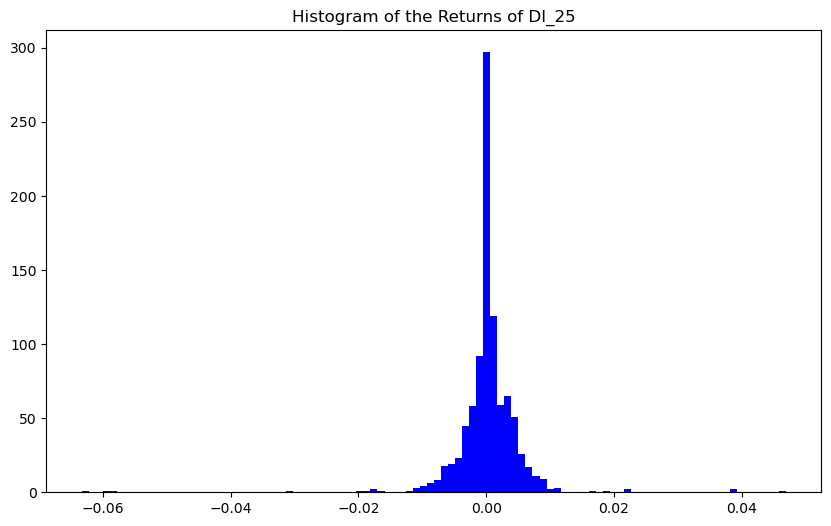

In [71]:
#Plot the histogram of the returns of the DI_25
plt.figure(figsize=(10,6))
plt.hist(df_returns['DI_25_Return_Log'].dropna(), bins=100, color='blue')
plt.title('Histogram of the Returns of DI_25')
plt.show()


In [72]:
#Risco de Mercado - VAR - Value at Risk not parametric - Historical Simulation

def var_not_parametric(df_returns, alpha=0.05):
    # Calcular o VAR
    var = df_returns.quantile(alpha)
    return var


#Calcular o VAR para os outros ativos
for col in df_returns.columns:
    if pd.api.types.is_float_dtype(df_returns[col]):
        var_95 = var_not_parametric(df_returns[col], alpha=0.05)
        print(f'VAR 95% - {col}: {var_95:.2%}')



VAR 95% - DI_25_Return_Log: -0.60%
VAR 95% - DI_26_Return_Log: -0.75%
VAR 95% - DI_27_Return_Log: -0.94%
VAR 95% - DI_28_Return_Log: -1.16%
VAR 95% - DI_29_Return_Log: -1.31%
VAR 95% - DI_30_Return_Log: -1.49%
VAR 95% - DI_31_Return_Log: -1.69%
VAR 95% - DI_32_Return_Log: -1.61%
VAR 95% - DI_33_Return_Log: -2.10%
VAR 95% - DI_35_Return_Log: -2.52%
VAR 95% - DAP25_Return_Log: -0.34%
VAR 95% - DAP26_Return_Log: -0.47%
VAR 95% - DAP27_Return_Log: -0.43%
VAR 95% - DAP28_Return_Log: -0.62%
VAR 95% - DAP30_Return_Log: -0.77%
VAR 95% - DAP32_Return_Log: -0.81%
VAR 95% - DAP35_Return_Log: -1.10%
VAR 95% - DAP40_Return_Log: -1.29%
VAR 95% - WDO1_Return_Log: -1.66%
VAR 95% - IBOV_Return_Log: -2.18%
VAR 95% - TREASURY_Return_Log: -1.73%
VAR 95% - S&P_Return_Log: -2.03%


In [73]:
#Calculate the CVAR
def cvar_not_parametric(df_returns, alpha=0.05):
    # Calcular o VAR
    var = df_returns.quantile(alpha)
    
    # Filtrar os retornos menores que o VAR
    returns_below_var = df_returns[df_returns < var]

    # Calcular o CVAR
    cvar = returns_below_var.mean()
    return cvar

#Calcular o CVAR para os outros ativos
for col in df_returns.columns:
    if pd.api.types.is_float_dtype(df_returns[col]):
        cvar_95 = cvar_not_parametric(df_returns[col], alpha=0.05)
        print(f'CVAR 95% - {col}: {cvar_95:.2%}')



CVAR 95% - DI_25_Return_Log: -1.27%
CVAR 95% - DI_26_Return_Log: -1.59%
CVAR 95% - DI_27_Return_Log: -1.90%
CVAR 95% - DI_28_Return_Log: -2.23%
CVAR 95% - DI_29_Return_Log: -2.48%
CVAR 95% - DI_30_Return_Log: -2.81%
CVAR 95% - DI_31_Return_Log: -3.12%
CVAR 95% - DI_32_Return_Log: -2.23%
CVAR 95% - DI_33_Return_Log: -3.78%
CVAR 95% - DI_35_Return_Log: -4.44%
CVAR 95% - DAP25_Return_Log: -0.85%
CVAR 95% - DAP26_Return_Log: -1.00%
CVAR 95% - DAP27_Return_Log: -0.56%
CVAR 95% - DAP28_Return_Log: -1.29%
CVAR 95% - DAP30_Return_Log: -1.48%
CVAR 95% - DAP32_Return_Log: -1.07%
CVAR 95% - DAP35_Return_Log: -2.09%
CVAR 95% - DAP40_Return_Log: -1.73%
CVAR 95% - WDO1_Return_Log: -2.18%
CVAR 95% - IBOV_Return_Log: -3.50%
CVAR 95% - TREASURY_Return_Log: -2.31%
CVAR 95% - S&P_Return_Log: -2.90%


In [74]:
df_returns

,Date,DI_25_Return_Log,DI_26_Return_Log,DI_27_Return_Log,DI_28_Return_Log,DI_29_Return_Log,DI_30_Return_Log,DI_31_Return_Log,DI_32_Return_Log,DI_33_Return_Log,...,DAP27_Return_Log,DAP28_Return_Log,DAP30_Return_Log,DAP32_Return_Log,DAP35_Return_Log,DAP40_Return_Log,WDO1_Return_Log,IBOV_Return_Log,TREASURY_Return_Log,S&P_Return_Log
1,2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-10,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,NaN,NaN,...,NaN,0.00,0.00,NaN,0.00,NaN,-0.00,-0.01,0.00,-0.00
3,2020-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,2024-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,2024-12-10,0.00,0.00,0.01,0.01,0.01,0.02,0.02,0.03,0.03,...,0.00,0.00,0.01,0.01,0.01,0.02,-0.00,0.01,-0.01,-0.01
1799,2024-12-11,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,...,0.00,0.01,0.01,0.01,0.02,0.02,-0.01,0.01,-0.01,0.00
1800,2024-12-12,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.03,-0.00,-0.00


In [75]:
df

,Date,DI_25,DI_26,DI_27,DI_28,DI_29,DI_30,DI_31,DI_32,DI_33,...,DAP27_Return,DAP28_Return,DAP30_Return,DAP32_Return,DAP35_Return,DAP40_Return,WDO1_Return,IBOV_Return,TREASURY_Return,S&P_Return
1,2020-01-09,73581.04,68474.64,63599.49,59096.78,54839.65,50909.64,46957.02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-10,73599.10,68415.38,63574.56,59046.46,54762.84,50829.18,46874.38,NaN,NaN,...,NaN,0.00,0.00,NaN,0.00,NaN,-0.00,-0.01,0.00,-0.00
3,2020-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-13,73411.89,68184.79,63302.33,58712.25,54368.13,50421.39,46459.98,NaN,NaN,...,NaN,-0.00,-0.00,NaN,-0.01,NaN,0.01,0.02,0.01,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,2024-12-09,99286.81,86554.05,75092.58,65509.72,57526.86,50592.06,44522.72,39201.10,34522.84,...,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.01,-0.00,-0.01
1798,2024-12-10,99329.81,86734.68,75535.85,66171.40,58340.90,51497.30,45471.20,40198.76,35541.49,...,0.00,0.00,0.01,0.01,0.01,0.02,-0.00,0.01,-0.01,-0.01
1799,2024-12-11,99371.93,86876.33,75848.35,66550.87,58772.19,51933.50,45914.56,40635.52,35962.90,...,0.00,0.01,0.01,0.01,0.02,0.02,-0.01,0.01,-0.01,0.00
1800,2024-12-12,99410.12,86605.82,75587.11,66378.07,58637.59,51807.74,45790.52,40553.64,35872.25,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.03,-0.00,-0.00


In [76]:
#export the dataframe to excel
df_returns.to_csv('df_returns.csv', index=False)


<h3>Modelo de OLS</h3>
<h4>Usando IDA & IMA-B sem ajuste</h4>

<h4>Visualizar dados com notação cientifica</h4>

<h3>Residuais Plot</h3>

<h5>Previsões por Variação Residual </h5>

<h5>Por tempo</h5>

<h3>Teste de Breusch-Pagan</h3>
<h5>Teste para ver se existe heterocedasticidade, ele avalia se os resíduos ao quadrado podem ser explicados pelas varaiveis independentes. Heterocedasticidade é uma variância na explicação das variaveis independentes, ou seja não existe dispersão constante </h5>


<h3>Pegando Betas do Modelo</h3>

<h3>Plots do Modelo</h3>
<h5>Tentativa 1</h5>


<h5>Tentativa 2 em um recorte temporal de 2024 </h5>


<h5>Recorte temporal de Novembro de 2024</h5>


<h5>Cotações Fundo</h5>

<h5>Check de valores</h5>
<h5>Soma da Contribuição do IMA-B, IDA e da Constante </h5>

<h3>Tentativas de Tirar a multicolinearidade do modelo</h3>
<h5>So fazendo a diferença direta ( possível maneira burra ) </h5>

<h5>Somando IMA-B no Resíduo</h5>


<h3>Refazendo a OLS tirando a colinearidade</h3>
<h5>Removi a variação percentual do IMA-B direto do IDA e rodeio o OLS novamente</h5>


<h5>Colocando os dados sem notação científica</h5>

<h3>Plotando os novos dados de variação</h3>
<h5>Recorte temporal de Novembro de 2024</h5>

<h5>Plot dos retornos do fundo</h5>


<H3>Check de valores</H3>

<h3>ANALISANDO POR QUE DEU ERRADO ?????????</h3>


<h3>Resultado Final Parcial</h3>

<h5>Plotando cotações</h5>

<h3> Check Dados</h3>

<h3>Tentativas de tirar o ESPAÇO</h3>
